In [1]:
# Import all packages to use further
import pandas as pd  # Data frame Libaray: data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # Scientific Calculation library
import matplotlib.pyplot as plt # plotting 2D & 3D graph
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib
from sklearn import metrics

In [2]:
data = pd.read_csv('loan_data.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 18 columns):
Age                          20500 non-null int64
Gender                       20500 non-null int64
Marital Status               20500 non-null int64
Home Ownership               20500 non-null int64
Family member                20500 non-null int64
Education Qualiication       20500 non-null int64
Monthly Income               20500 non-null int64
Monthly Expense              20500 non-null int64
Earning Member               20500 non-null int64
Savings Status               20500 non-null int64
Business Type                20500 non-null int64
Business Location            20500 non-null int64
Residence Area               20500 non-null int64
Bank Account Status          20500 non-null int64
Loan Purpose                 20500 non-null int64
Current Business Duration    20500 non-null int64
Business Nature              20500 non-null int64
Dft                          20500 non-nu

In [4]:
data.head()

,Age,Gender,Marital Status,Home Ownership,Family member,Education Qualiication,Monthly Income,Monthly Expense,Earning Member,Savings Status,Business Type,Business Location,Residence Area,Bank Account Status,Loan Purpose,Current Business Duration,Business Nature,Dft
0,32,5,7,10,5,17,3500,900,3,44,61,68,49,54,59,29,84,1
1,41,5,7,10,5,18,40000,12200,8,44,62,65,49,53,56,14,80,0
2,49,5,8,9,10,127,12700,4300,5,44,62,68,51,53,58,4,81,0
3,31,6,7,9,4,17,20600,6100,7,43,62,65,50,53,57,5,74,0
4,23,5,8,10,5,21,15900,2900,1,44,62,68,50,53,60,1,78,1


In [5]:
data.tail()

,Age,Gender,Marital Status,Home Ownership,Family member,Education Qualiication,Monthly Income,Monthly Expense,Earning Member,Savings Status,Business Type,Business Location,Residence Area,Bank Account Status,Loan Purpose,Current Business Duration,Business Nature,Dft
20495,24,5,7,11,11,21,14700,30400,7,43,62,67,52,53,56,9,84,0
20496,31,5,7,11,10,22,22800,41300,9,43,64,67,50,53,59,3,76,0
20497,25,5,7,11,4,19,24300,16700,7,44,62,67,51,53,58,10,84,0
20498,33,5,7,9,5,127,10800,19500,5,43,61,67,50,53,60,3,78,0
20499,31,6,8,11,7,22,21900,7300,10,43,63,68,52,53,56,11,84,0


In [6]:
num_obs = len(data)
num_true = len(data.loc[data['Dft'] == 1])
num_false = len(data.loc[data['Dft'] == 0])
print("Number of defaulter cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of non defaulter cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of defaulter cases:  1451 (7.08%)
Number of non defaulter cases: 19049 (92.92%)


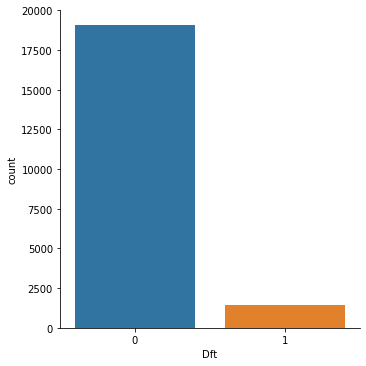

In [7]:
sns.catplot(x = "Dft", kind = "count", data = data)

In [8]:
data.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Home Ownership               0
Family member                0
Education Qualiication       0
Monthly Income               0
Monthly Expense              0
Earning Member               0
Savings Status               0
Business Type                0
Business Location            0
Residence Area               0
Bank Account Status          0
Loan Purpose                 0
Current Business Duration    0
Business Nature              0
Dft                          0
dtype: int64

In [9]:
data['Monthly Income'].describe()

count    20500.000000
mean     22067.414634
std      14692.205821
min       1000.000000
25%      10100.000000
50%      20100.000000
75%      30100.000000
max      60000.000000
Name: Monthly Income, dtype: float64

In [10]:
data['Monthly Expense'].describe()

count    20500.000000
mean     15256.692683
std      10195.474365
min        700.000000
25%       7000.000000
50%      13900.000000
75%      20900.000000
max      42000.000000
Name: Monthly Expense, dtype: float64

In [11]:
# Find correlations with the target and sort
correlations = data.corr()['Dft'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 Current Business Duration   -0.087512
Business Nature             -0.075633
Earning Member              -0.067405
Marital Status               0.020494
Bank Account Status          0.032435
Savings Status               0.038905
Home Ownership               0.042821
Business Type                0.057004
Residence Area               0.062056
Education Qualiication       0.072500
Family member                0.080208
Loan Purpose                 0.083100
Monthly Expense              0.107133
Business Location            0.119132
Dft                          1.000000
Name: Dft, dtype: float64

Most Negative Correlations:
 Gender                      -0.267286
Monthly Income              -0.186902
Age                         -0.101572
Current Business Duration   -0.087512
Business Nature             -0.075633
Earning Member              -0.067405
Marital Status               0.020494
Bank Account Status          0.032435
Savings Status               0.038905
Hom

In [12]:
data['Monthly Income'].corr(data['Dft'])

-0.186901703371722

In [13]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
# Split-out validation dataset
array = data.values
X = array[:,0:16]
y = array[:,17]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [15]:
score=[] #these variables will be used to show the algorithm name and its successes.
algorithms=[] 

KNN accuracy = 91.02439024390245


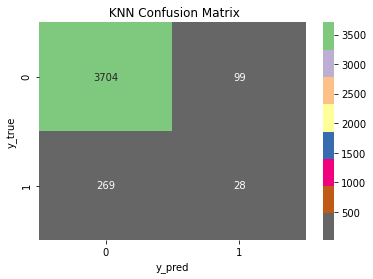

In [16]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
# y=df["class"].values
# x_data=df.drop(["class"],axis=1)

#Normalization
# x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

#Preparing the test and training set
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

#model and accuracy
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)
score.append(knn.score(x_test,y_test)*100)
algorithms.append("KNN")
print("KNN accuracy =",knn.score(x_test,y_test)*100)

knn_pred_proba = knn.predict_proba(x_test)
knn_pred_proba = knn_pred_proba[:, 1]

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
ax = plt.subplot()
#f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Accent_r')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" KNN Confusion Matrix")
plt.show()

Navie Bayes accuracy = 94.21951219512195


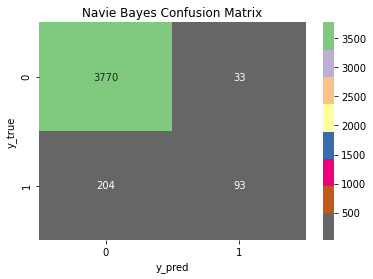

In [17]:
#Navie-Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

#Training
nb.fit(x_train,y_train)
#Test
score.append(nb.score(x_test,y_test)*100)
algorithms.append("Navie-Bayes")
print("Navie Bayes accuracy =",nb.score(x_test,y_test)*100)

nb_pred_proba = nb.predict_proba(x_test)
nb_pred_proba = nb_pred_proba[:, 1]

#Confusion Matrix 
from sklearn.metrics import confusion_matrix
y_pred=nb.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap

ax = plt.subplot()
#f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Accent_r')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Navie Bayes Confusion Matrix")
plt.show()

In [ ]:
# #Support Vector Machine
# from sklearn.svm import SVC
# svm=SVC(random_state=1, probability=True)
# svm.fit(x_train,y_train)
# score.append(svm.score(x_test,y_test)*100)
# algorithms.append("Support Vector Machine")
# print("svm test accuracy =",svm.score(x_test,y_test)*100)

# svm_pred_proba = svm.predict_proba(x_test)
# svm_pred_proba = svm_pred_proba[:, 1]

# #Confusion Matrix
# from sklearn.metrics import confusion_matrix
# y_pred=svm.predict(x_test)
# y_true=y_test
# cm=confusion_matrix(y_true,y_pred)

# #Confusion Matrix on Heatmap
# f,ax=plt.subplots(figsize=(5,5))
# sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
# plt.xlabel("y_pred")
# plt.ylabel("y_true")
# plt.title("Support Vector Machine Confusion Matrix")
# plt.show()

Decision Tree accuracy: 92.85365853658537


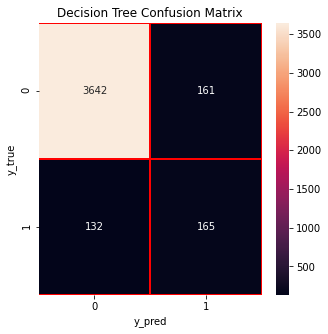

In [18]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Decision Tree accuracy:",dt.score(x_test,y_test)*100)
score.append(dt.score(x_test,y_test)*100)
algorithms.append("Decision Tree")

dt_pred_proba = dt.predict_proba(x_test)
dt_pred_proba = dt_pred_proba[:, 1]

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=dt.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix")
plt.show()

Random Forest accuracy = 0.9556097560975609


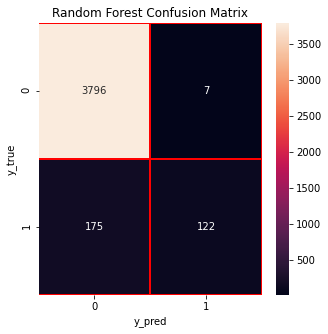

In [19]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
score.append(rf.score(x_test,y_test)*100)
algorithms.append("Random Forest")
print("Random Forest accuracy =",rf.score(x_test,y_test))

rf_pred_proba = rf.predict_proba(x_test)
rf_pred_proba = rf_pred_proba[:, 1]

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()

LR accuracy 0.9280487804878049


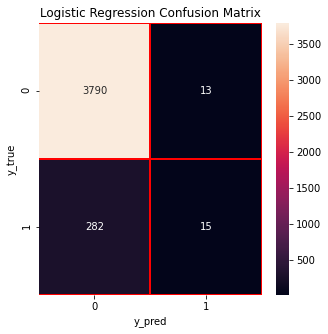

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
score.append(lr.score(x_test,y_test)*100)
algorithms.append("Logistic Regression")
print("LR accuracy {}".format(lr.score(x_test,y_test)))

lr_pred_proba = lr.predict_proba(x_test)
lr_pred_proba = lr_pred_proba[:, 1]

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [23]:
# # Logistics Regression
# from sklearn.linear_model import LogisticRegression
# from sklearn import preprocessing
# lr_model = LogisticRegression()
# lr_model.fit(X_train,y_train)


In [24]:
# lr_pred = lr_model.predict(X_test)
# # Logistic regression 
# from sklearn.metrics import accuracy_score
# acc = accuracy_score(y_test, lr_pred)
# print("Accuracy on test set is", acc)
# print ('\n')
# # labels for set 1=True to upper left and 0 = False to lower right
# print ("{0}".format(metrics.classification_report(y_test, lr_pred)))

In [25]:
# from sklearn import metrics

# # Create a Gaussian classifier
# from sklearn.naive_bayes import GaussianNB
# nb_model = GaussianNB()

# nb_model.fit(X_train, y_train)

# nb_pred = nb_model.predict(X_test)

# print('Naive Bayes accuracy:', round(accuracy_score(y_test, nb_pred), 3))

# cm_nb =  confusion_matrix(y_test, nb_pred)
# print ('\n')

# # labels for set 1=True to upper left and 0 = False to lower right
# print ("{0}".format(metrics.classification_report(y_test, nb_pred)))

In [26]:
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors=5)

# model.fit(X_train, y_train)

# knn_pred = model.predict(X_test)

# print('KNN Algorithm:', round(accuracy_score(y_test, knn_pred), 2))
# cm_knn =  confusion_matrix(y_test, knn_pred)

# print ('\n')

# # labels for set 1=True to upper left and 0 = False to lower right
# print ("{0}".format(metrics.classification_report(y_test, knn_pred)))

In [27]:
# from sklearn import tree
# from sklearn.metrics import confusion_matrix, classification_report
# model = tree.DecisionTreeClassifier()

# model.fit(X_train, y_train)

# dt_pred = model.predict(X_test)

# print('Decision Tree Algorithm:', round(accuracy_score(y_test, dt_pred), 3))

# cm_dt =  confusion_matrix(y_test, y_pred)

# print ('\n')

# # labels for set 1=True to upper left and 0 = False to lower right
# print ("{0}".format(metrics.classification_report(y_test, dt_pred)))

In [28]:
# from sklearn.neural_network import MLPClassifier
# # Create a RandomForestClassifier object
# ann_model = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500, random_state=42)

# ann_model.fit(X_train, y_train.ravel())
# prediction_from_trained_data = ann_model.predict(X_train)
# from sklearn import metrics

# accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

# print ("Accuracy of our ANN model is : {0:.4f}".format(accuracy))
# ann_pred = ann_model.predict(X_test)

# #get accuracy
# ann_accuracy_testdata = metrics.accuracy_score(y_test, ann_pred)

# #print accuracy
# print ("Accuracy: {0:.4f}".format(ann_accuracy_testdata))
# print ("")
# print('ANN Algorithm:', round(accuracy_score(y_test, ann_pred), 2))

# # labels for set 1=True to upper left and 0 = False to lower right
# print ("{0}".format(metrics.classification_report(y_test, ann_pred, labels=[ 1,0])))

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr_1, tpr_1, _ = roc_curve(y_test, knn_pred_proba)
fpr_2, tpr_2, _ = roc_curve(y_test, nb_pred_proba)
fpr_3, tpr_3, _ = roc_curve(y_test, svm_pred_proba)
fpr_4, tpr_4, _ = roc_curve(y_test, dt_pred_proba)
fpr_5, tpr_5, _ = roc_curve(y_test, rf_pred_proba)
fpr_6, tpr_6, _ = roc_curve(y_test, lr_pred_proba)

roc_auc = dict()

roc_auc[0] = auc(fpr_1, tpr_1)
roc_auc[1] = auc(fpr_2, tpr_2)
roc_auc[2] = auc(fpr_3, tpr_3)
roc_auc[3] = auc(fpr_4, tpr_4)
roc_auc[4] = auc(fpr_5, tpr_5)
roc_auc[5] = auc(fpr_6, tpr_6)

NameError: name 'svm_pred_proba' is not defined

In [31]:
sns.set_style("white")
plt.figure(figsize=(7, 5))

plt.plot(fpr_1, tpr_1, color = "#666666" , label = "KNN - %0.3f" % roc_auc[0], lw=3)
plt.plot(fpr_2, tpr_2, color = "deeppink" , label = "NB - %0.3f" % roc_auc[1], lw=3)
plt.plot(fpr_3, tpr_3, color = "#4caf50" , label = "SVM - %0.3f" % roc_auc[2], lw=3)
plt.plot(fpr_4, tpr_4, color = "#007bff" , label = "DT - %0.3f" % roc_auc[3], lw=3)
plt.plot(fpr_5, tpr_5, color = "#ff3333" , label = "RF - %0.3f" % roc_auc[4], lw=3)
plt.plot(fpr_6, tpr_6, color = "#ffa505" , label = "LR - %0.3f" % roc_auc[5], lw=3)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)
plt.legend(loc="lower right", fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

NameError: name 'roc_auc' is not defined